In [1]:
import os
import glob
import time
import numpy as np
import xarray as xr
import pandas as pd
import seaborn as sns
import geopandas as gpd

import cartopy
import cartopy.feature as cf
import cartopy.crs as ccrs

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from scipy.stats import gaussian_kde

from joblib import Parallel, delayed

import sys
sys.path.append(os.path.abspath(".."))
from function import ART_downscale as ART_down

In [2]:
dir_base = os.path.join('/','media','arturo','Arturo','Data','Italy','Satellite','1_BETA')

labels = ['3h/3px', '1dy/3px', '1dy/5px', '1dy/7px', '1dy/9px']

In [3]:
veneto_dir = os.path.join('/','media','arturo','Arturo','Data','shapes','Europa','Italy')

if os.path.exists(veneto_dir):
    VENETO = gpd.read_file(os.path.join(veneto_dir,'Veneto.geojson'))
    DEM = gpd.read_file(os.path.join(veneto_dir,'Veneto_DEM_500.geojson'))
else:
    raise SystemExit(f"File not found: {veneto_dir}")

## Compare between IMERG 1 day and 3 hours

In [4]:
beta_dir = os.path.join(dir_base,'VENETO_BETA_IMERG_3h_2002_2012.nc')
BETA = xr.open_dataset(beta_dir)

lat = BETA['lat'].values
lon = BETA['lon'].values
lon2d, lat2d = np.meshgrid(lon, lat)

BETA_3h = BETA['BETA'].values

In [5]:
beta_dir = os.path.join(dir_base,'VENETO_BETA_IMERG_1dy_2002_2012.nc')
BETA = xr.open_dataset(beta_dir)

BETA_1dy = BETA['BETA'].values

In [6]:
beta_dir = os.path.join(dir_base,'VENETO_BETA_IMERG_1dy_2002_2012_npix_5.nc')
BETA = xr.open_dataset(beta_dir)

BETA_1dy_5pix = BETA['BETA'].values

In [7]:
beta_dir = os.path.join(dir_base,'VENETO_BETA_IMERG_1dy_2002_2012_npix_7.nc')
BETA = xr.open_dataset(beta_dir)

BETA_1dy_7pix = BETA['BETA'].values

In [8]:
beta_dir = os.path.join(dir_base,'VENETO_BETA_IMERG_1dy_2002_2012_npix_9.nc')
BETA = xr.open_dataset(beta_dir)

BETA_1dy_9pix = BETA['BETA'].values

Export figure to: ../figures/VENETO_IMERG_BETAS.png


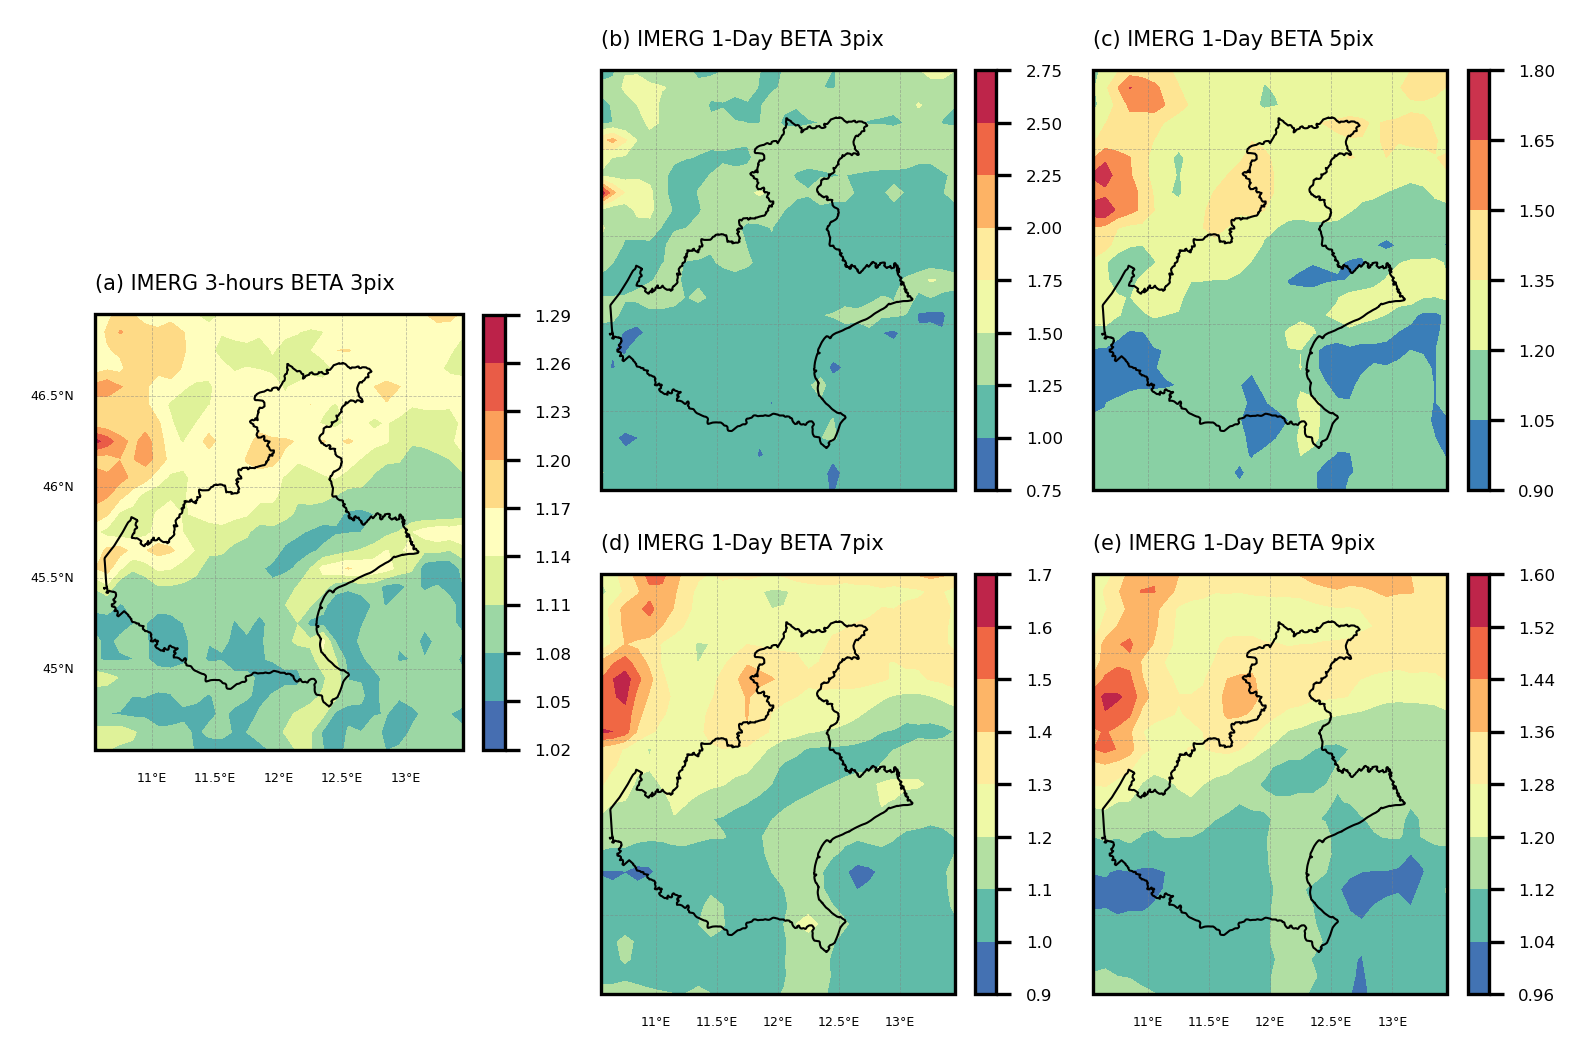

In [9]:
cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(6,4),dpi=300)
gs = gridspec.GridSpec(2,3)

# ==============================================================================
ax1 = plt.subplot(gs[0:, 0], projection = proj)
VENETO.plot(facecolor='None', ax=ax1, zorder=10, linewidth=0.5)
# DEM.plot(facecolor='None', ax=ax1, zorder=10, linewidth=0.1, color='grey', alpha=0.6)

a1 = ax1.contourf(lon2d, lat2d, BETA_3h, cmap=cmap)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels = True
gl.xlabel_style = {'size': 3, 'color': 'k'}
gl.ylabel_style = {'size': 3, 'color': 'k'}

cbar = plt.colorbar(a1, fraction=0.053)
cbar.ax.tick_params(labelsize=4)

ax1.set_title('(a) IMERG 3-hours BETA 3pix', fontsize=5, loc='left')

# ==============================================================================
ax1 = plt.subplot(gs[0, 1], projection = proj)
VENETO.plot(facecolor='None', ax=ax1, zorder=10, linewidth=0.5)

a1 = ax1.contourf(lon2d, lat2d, BETA_1dy, cmap=cmap)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.right_labels = False
gl.left_labels = False
gl.xlabel_style = {'size': 3, 'color': 'k'}
gl.ylabel_style = {'size': 3, 'color': 'k'}

cbar = plt.colorbar(a1, fraction=0.053)
cbar.ax.tick_params(labelsize=4)

ax1.set_title('(b) IMERG 1-Day BETA 3pix', fontsize=5, loc='left')

# ==============================================================================
ax1 = plt.subplot(gs[0, 2], projection = proj)
VENETO.plot(facecolor='None', ax=ax1, zorder=10, linewidth=0.5)

a1 = ax1.contourf(lon2d, lat2d, BETA_1dy_5pix, cmap=cmap)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.right_labels = False
gl.left_labels = False
gl.xlabel_style = {'size': 3, 'color': 'k'}
gl.ylabel_style = {'size': 3, 'color': 'k'}

cbar = plt.colorbar(a1, fraction=0.053)
cbar.ax.tick_params(labelsize=4)

ax1.set_title('(c) IMERG 1-Day BETA 5pix', fontsize=5, loc='left')

# ==============================================================================
ax1 = plt.subplot(gs[1, 1], projection = proj)
VENETO.plot(facecolor='None', ax=ax1, zorder=10, linewidth=0.5)

a1 = ax1.contourf(lon2d, lat2d, BETA_1dy_7pix, cmap=cmap)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels = False
gl.xlabel_style = {'size': 3, 'color': 'k'}
gl.ylabel_style = {'size': 3, 'color': 'k'}

cbar = plt.colorbar(a1, fraction=0.053)
cbar.ax.tick_params(labelsize=4)

ax1.set_title('(d) IMERG 1-Day BETA 7pix', fontsize=5, loc='left')

# ==============================================================================
ax1 = plt.subplot(gs[1, 2], projection = proj)
VENETO.plot(facecolor='None', ax=ax1, zorder=10, linewidth=0.5)

a1 = ax1.contourf(lon2d, lat2d, BETA_1dy_9pix, cmap=cmap)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels = False
gl.xlabel_style = {'size': 3, 'color': 'k'}
gl.ylabel_style = {'size': 3, 'color': 'k'}

cbar = plt.colorbar(a1, fraction=0.053)
cbar.ax.tick_params(labelsize=4)

ax1.set_title('(e) IMERG 1-Day BETA 9pix', fontsize=5, loc='left')

salida = os.path.join('..','figures',f'VENETO_IMERG_BETAS.png')
print(f'Export figure to: {salida}')
plt.savefig(salida,transparent = False,bbox_inches ='tight',pad_inches = 0.1, facecolor=None)

In [10]:
BETA_list = np.zeros([5, len(lat)*len(lon)])
BETA_list[0,:] = BETA_3h.flatten()
BETA_list[1,:] = BETA_1dy.flatten()
BETA_list[2,:] = BETA_1dy_5pix.flatten()
BETA_list[3,:] = BETA_1dy_7pix.flatten()
BETA_list[4,:] = BETA_1dy_9pix.flatten()

cummulativeC = []
for nn in range(np.shape(BETA_list)[0]):
    XC = np.sort(BETA_list[nn,:])
    NC = len(BETA_list[nn,:])
    YC = np.arange(NC) / float(NC)

    cummulativeC.append(YC)

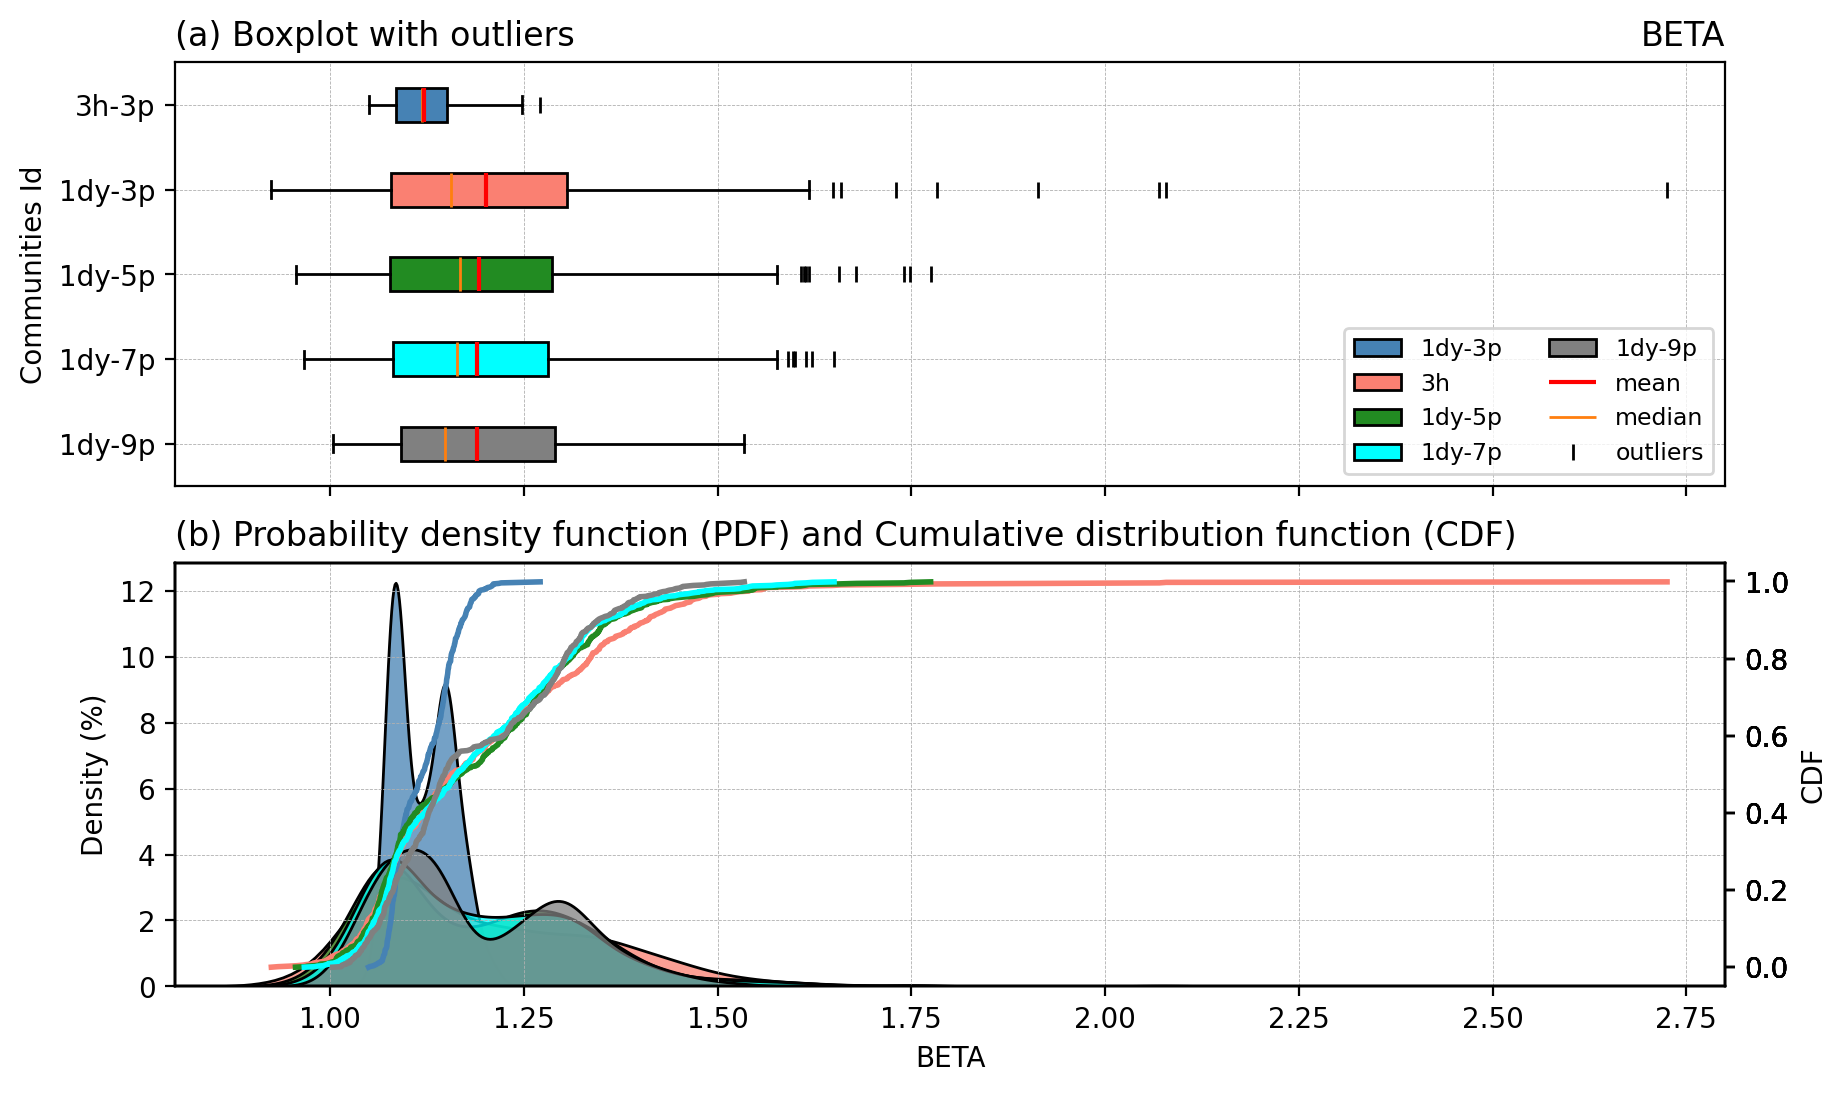

In [11]:
fig = plt.figure(figsize=(10,6),dpi=200)
gs = gridspec.GridSpec(2,1)

colors = ['steelblue', 'salmon', 'forestgreen', 'cyan', 'grey']

boxes = []
medians = []
mean = []
fliers = []

# =========================================================================================================================
ax1 = plt.subplot(gs[0, 0])
for nn in range(np.shape(BETA_list)[0]):
    box = ax1.boxplot(BETA_list[nn],positions=[5-nn],vert=False,
    widths=0.4,boxprops=dict(facecolor=colors[nn],color='k'),
    showmeans=True,meanline=True,meanprops=dict(linestyle='-',color="r",linewidth=1.5),
    showfliers=True,flierprops=dict(marker='|',color='k',linewidth=1.5),
    patch_artist=True,notch=False)

    boxes.append(box["boxes"][0])
    medians.append(box["medians"][0])
    mean.append(box["means"][0])
    fliers.append(box["fliers"][0])

ax1.set_xlim(0.8,2.8)

ax1.set_yticks([1,2,3,4,5])
ax1.set_yticklabels(['1dy-9p', '1dy-7p', '1dy-5p', '1dy-3p', '3h-3p'])

ax1.set_xticklabels([])
ax1.set_ylabel('Communities Id',fontsize=10)
ax1.set_title('(a) Boxplot with outliers',fontsize=12, loc='left')
ax1.set_title('BETA',fontsize=12, loc='right')

ax1.grid(linestyle='--',linewidth=0.3)

ax1.legend([boxes[0], boxes[1], boxes[2], boxes[3], boxes[4], mean[0], medians[0], fliers[0]],
        ['1dy-3p', '3h', '1dy-5p', '1dy-7p', '1dy-9p', 'mean', 'median', 'outliers'], 
        ncol=2,fontsize=8.5,loc=0)

# =========================================================================================================================
ax1 = plt.subplot(gs[1, 0])
for nn in range(np.shape(BETA_list)[0]):
    sns.kdeplot(BETA_list[nn],color=colors[nn],cumulative=False,multiple="stack",ax=ax1)
    ax2 = ax1.twinx()
    a2 = ax2.plot(np.sort(BETA_list[nn]),cummulativeC[nn],color=colors[nn],linewidth=2,alpha=1)

ax1.set_xlim(0.8,2.8)

ax1.set_xlabel('BETA',fontsize=10)
ax1.set_ylabel('Density (%)',fontsize=10)
ax2.set_ylabel('CDF',fontsize=10)
ax1.set_title('(b) Probability density function (PDF) and Cumulative distribution function (CDF)',fontsize=12, loc='left')

ax1.grid(linestyle='--',linewidth=0.3)

# =========================================================================================================================
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, hspace=0.18, wspace=0.09)

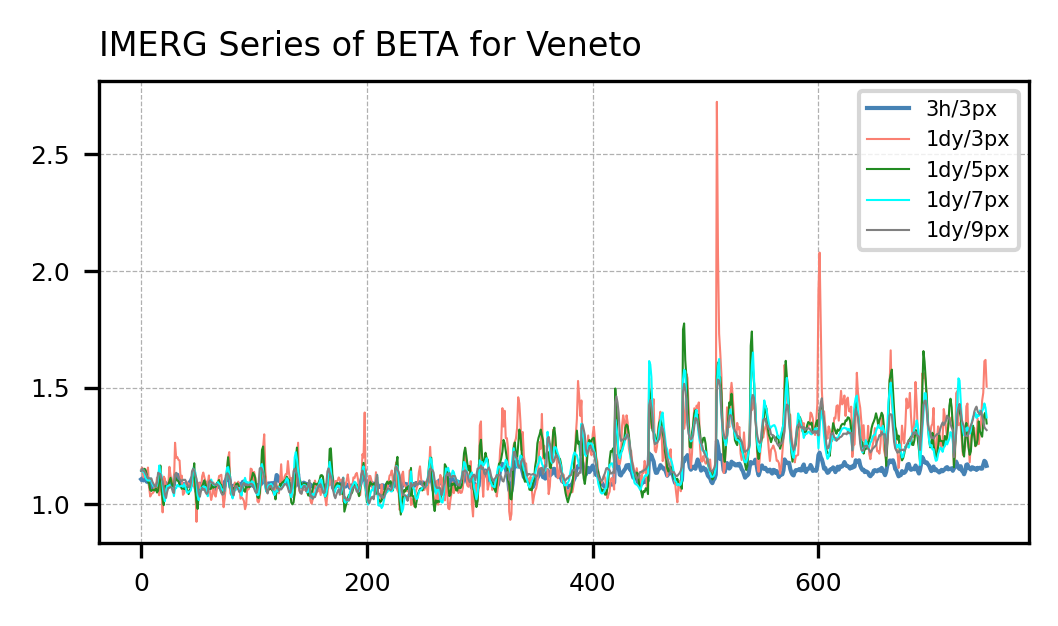

In [12]:
fig = plt.figure(figsize=(4,2),dpi=300)
gs = gridspec.GridSpec(1,1)

ax1 = plt.subplot(gs[0, 0])
for nn in range(np.shape(BETA_list)[0]):
    if nn == 0:
        linewidth = 1
    else:
        linewidth = 0.5
    ax1.plot(BETA_list[nn], linewidth=linewidth, label=labels[nn], color=colors[nn])

ax1.legend(fontsize=5, loc=1)

ax1.set_title('IMERG Series of BETA for Veneto',fontsize=8, loc='left')

plt.xticks(fontsize=6, rotation=0)
plt.yticks(fontsize=6, rotation=0)
plt.grid(linestyle='--',linewidth=0.3)

## Downscale Results

In [13]:
file_dir = os.path.join('/','media','arturo','Arturo','Data','Italy','Satellite','2_GAMMA','VENETO_GAMMA_IMERG_3h_2002_2012.nc')
dir_data = os.path.join(dir_base,file_dir)

TMP = xr.open_dataset(dir_data)
GAMMA = TMP['BETA'].values
del TMP

In [14]:
file_dir = os.path.join('/','media','arturo','Arturo','Data','Italy','Satellite','IMERG','3h','IMERG_Italy_3h_2001_01_01_2023_12_31.nc')
dir_data = os.path.join(dir_base,file_dir)

yy_s, yy_e = 2002, 2012
years_num = yy_e - yy_s + 1
lon_min, lon_max, lat_min, lat_max = 10.5, 13.5, 44.5, 47

PRE_data = xr.open_dataset(dir_data)
PRE_data = PRE_data.sel(time=PRE_data.time.dt.year.isin([np.arange(yy_s,yy_e+1)]))
PRE_data = PRE_data.sel(lat=slice(lat_min-1.5, lat_max+1.5), lon=slice(lon_min-1.5, lon_max+1.5))

lats = PRE_data['lat'].data
lons = PRE_data['lon'].data

lon2d, lat2d = np.meshgrid(lons, lats)

nlon = np.size(lons)
nlat = np.size(lats)
ntime = len(PRE_data['time'])

year_vector = np.unique(pd.to_datetime(PRE_data['time']).year)

PRE_daily = PRE_data.resample(time ='D').sum(dim='time', skipna=False)

In [15]:
# Extracting lat and lon points for Study area (VENETO)
ds_veneto = PRE_data.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))
# PRE_mean = ds_veneto.mean(dim='time', skipna=True)

lat_ref = ds_veneto.lat.values
lon_ref = ds_veneto.lon.values

ndices_lat = np.where(np.isin(lats, lat_ref))[0]
ndices_lon = np.where(np.isin(lons, lon_ref))[0]

lon2d_ref, lat2d_ref = np.meshgrid(lon_ref, lat_ref)

del ds_veneto

In [16]:
N = np.zeros([years_num, len(lat_ref), len(lon_ref)])
C = np.zeros([years_num, len(lat_ref), len(lon_ref)])
W = np.zeros([years_num, len(lat_ref), len(lon_ref)])
for i in range(len(ndices_lat)):
    for j in range(len(ndices_lon)):
        TMP = ART_down.weibull_year_parameters(PRE_daily, lats[ndices_lat[i]], lons[ndices_lon[j]], 1, 50)
        N[:,i,j] = TMP[:,0]
        C[:,i,j] = TMP[:,1]
        W[:,i,j] = TMP[:,2]

In [18]:
Nd_3h, Cd_3h, Wd_3h = ART_down.down_year_parameters(N, C, W, BETA_3h, GAMMA)
Nd_1dy, Cd_1dy, Wd_1dy = ART_down.down_year_parameters(N, C, W, BETA_1dy, GAMMA)
Nd_1dy_5pix, Cd_1dy_5pix, Wd_1dy_5pix = ART_down.down_year_parameters(N, C, W, BETA_1dy_5pix, GAMMA)
Nd_1dy_7pix, Cd_1dy_7pix, Wd_1dy_7pix = ART_down.down_year_parameters(N, C, W, BETA_1dy_7pix, GAMMA)
Nd_1dy_9pix, Cd_1dy_9pix, Wd_1dy_9pix = ART_down.down_year_parameters(N, C, W, BETA_1dy_9pix, GAMMA)

Export figure to: ../figures/VENETO_IMERG_Cd.png


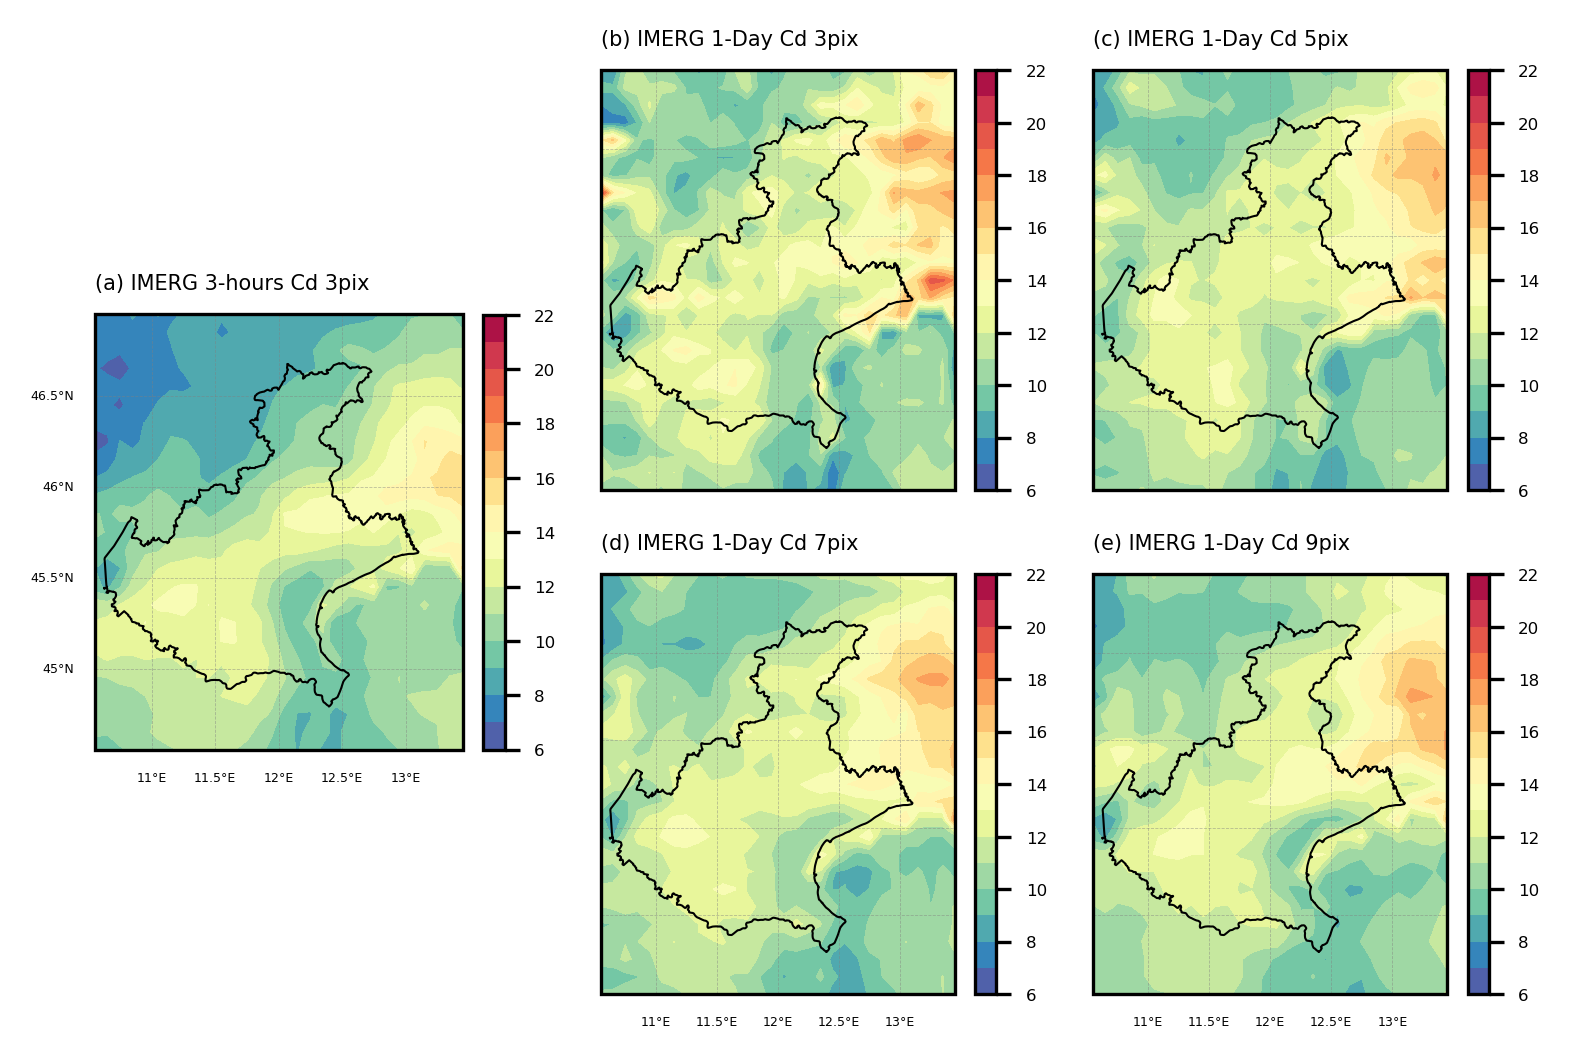

In [19]:
levels = np.arange(6,23,1)

cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(6,4),dpi=300)
gs = gridspec.GridSpec(2,3)

# ==============================================================================
ax1 = plt.subplot(gs[0:, 0], projection = proj)
VENETO.plot(facecolor='None', ax=ax1, zorder=10, linewidth=0.5)
# DEM.plot(facecolor='None', ax=ax1, zorder=10, linewidth=0.1, color='grey', alpha=0.6)

a1 = ax1.contourf(lon2d_ref, lat2d_ref, np.mean(Cd_3h,axis=0), cmap=cmap, levels=levels)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels = True
gl.xlabel_style = {'size': 3, 'color': 'k'}
gl.ylabel_style = {'size': 3, 'color': 'k'}

cbar = plt.colorbar(a1, fraction=0.053)
cbar.ax.tick_params(labelsize=4)

ax1.set_title('(a) IMERG 3-hours Cd 3pix', fontsize=5, loc='left')

# ==============================================================================
ax1 = plt.subplot(gs[0, 1], projection = proj)
VENETO.plot(facecolor='None', ax=ax1, zorder=10, linewidth=0.5)

a1 = ax1.contourf(lon2d_ref, lat2d_ref, np.mean(Cd_1dy,axis=0), cmap=cmap, levels=levels)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.right_labels = False
gl.left_labels = False
gl.xlabel_style = {'size': 3, 'color': 'k'}
gl.ylabel_style = {'size': 3, 'color': 'k'}

cbar = plt.colorbar(a1, fraction=0.053)
cbar.ax.tick_params(labelsize=4)

ax1.set_title('(b) IMERG 1-Day Cd 3pix', fontsize=5, loc='left')

# ==============================================================================
ax1 = plt.subplot(gs[0, 2], projection = proj)
VENETO.plot(facecolor='None', ax=ax1, zorder=10, linewidth=0.5)

a1 = ax1.contourf(lon2d_ref, lat2d_ref, np.mean(Cd_1dy_5pix,axis=0), cmap=cmap, levels=levels)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.right_labels = False
gl.left_labels = False
gl.xlabel_style = {'size': 3, 'color': 'k'}
gl.ylabel_style = {'size': 3, 'color': 'k'}

cbar = plt.colorbar(a1, fraction=0.053)
cbar.ax.tick_params(labelsize=4)

ax1.set_title('(c) IMERG 1-Day Cd 5pix', fontsize=5, loc='left')

# ==============================================================================
ax1 = plt.subplot(gs[1, 1], projection = proj)
VENETO.plot(facecolor='None', ax=ax1, zorder=10, linewidth=0.5)

a1 = ax1.contourf(lon2d_ref, lat2d_ref, np.mean(Cd_1dy_7pix,axis=0), cmap=cmap, levels=levels)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels = False
gl.xlabel_style = {'size': 3, 'color': 'k'}
gl.ylabel_style = {'size': 3, 'color': 'k'}

cbar = plt.colorbar(a1, fraction=0.053)
cbar.ax.tick_params(labelsize=4)

ax1.set_title('(d) IMERG 1-Day Cd 7pix', fontsize=5, loc='left')

# ==============================================================================
ax1 = plt.subplot(gs[1, 2], projection = proj)
VENETO.plot(facecolor='None', ax=ax1, zorder=10, linewidth=0.5)

a1 = ax1.contourf(lon2d_ref, lat2d_ref, np.mean(Cd_1dy_9pix,axis=0), cmap=cmap, levels=levels)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels = False
gl.xlabel_style = {'size': 3, 'color': 'k'}
gl.ylabel_style = {'size': 3, 'color': 'k'}

cbar = plt.colorbar(a1, fraction=0.053)
cbar.ax.tick_params(labelsize=4)

ax1.set_title('(e) IMERG 1-Day Cd 9pix', fontsize=5, loc='left')

salida = os.path.join('..','figures',f'VENETO_IMERG_Cd.png')
print(f'Export figure to: {salida}')
plt.savefig(salida,transparent = False,bbox_inches ='tight',pad_inches = 0.1, facecolor=None)

Export figure to: ../figures/VENETO_IMERG_Wd.png


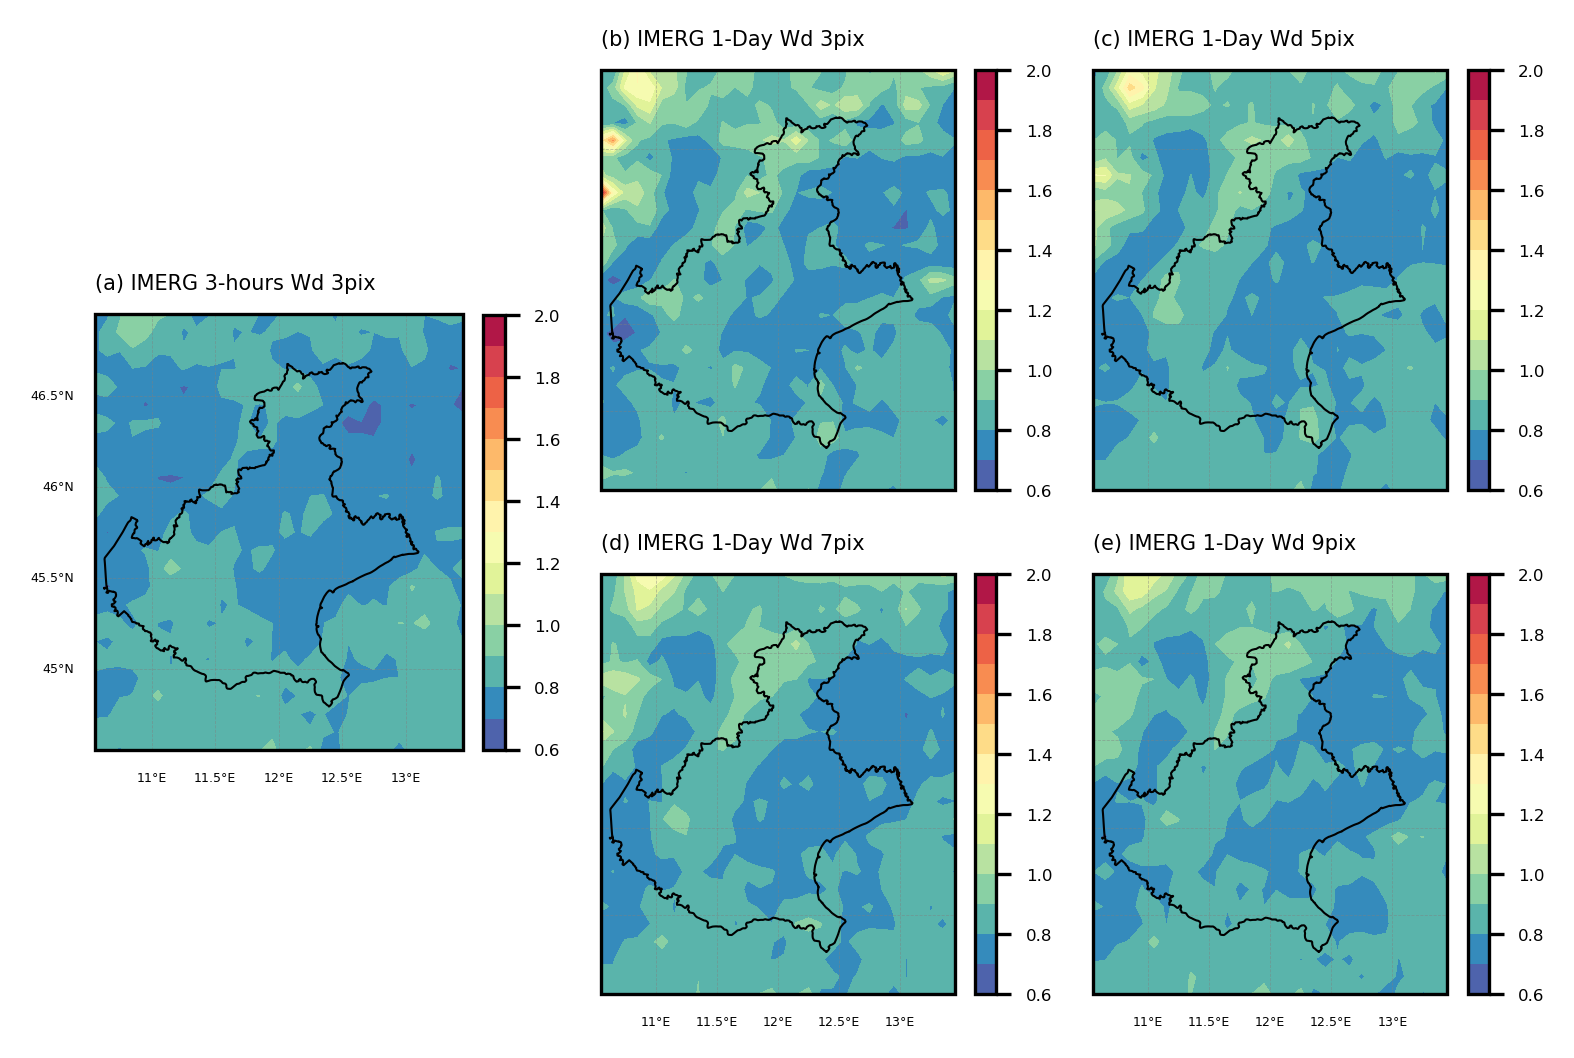

In [20]:
levels = np.arange(0.6,2.1,0.1)

cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(6,4),dpi=300)
gs = gridspec.GridSpec(2,3)

# ==============================================================================
ax1 = plt.subplot(gs[0:, 0], projection = proj)
VENETO.plot(facecolor='None', ax=ax1, zorder=10, linewidth=0.5)
# DEM.plot(facecolor='None', ax=ax1, zorder=10, linewidth=0.1, color='grey', alpha=0.6)

a1 = ax1.contourf(lon2d_ref, lat2d_ref, np.max(Wd_3h,axis=0), cmap=cmap, levels=levels)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels = True
gl.xlabel_style = {'size': 3, 'color': 'k'}
gl.ylabel_style = {'size': 3, 'color': 'k'}

cbar = plt.colorbar(a1, fraction=0.053)
cbar.ax.tick_params(labelsize=4)

ax1.set_title('(a) IMERG 3-hours Wd 3pix', fontsize=5, loc='left')

# ==============================================================================
ax1 = plt.subplot(gs[0, 1], projection = proj)
VENETO.plot(facecolor='None', ax=ax1, zorder=10, linewidth=0.5)

a1 = ax1.contourf(lon2d_ref, lat2d_ref, np.max(Wd_1dy,axis=0), cmap=cmap, levels=levels)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.right_labels = False
gl.left_labels = False
gl.xlabel_style = {'size': 3, 'color': 'k'}
gl.ylabel_style = {'size': 3, 'color': 'k'}

cbar = plt.colorbar(a1, fraction=0.053)
cbar.ax.tick_params(labelsize=4)

ax1.set_title('(b) IMERG 1-Day Wd 3pix', fontsize=5, loc='left')

# ==============================================================================
ax1 = plt.subplot(gs[0, 2], projection = proj)
VENETO.plot(facecolor='None', ax=ax1, zorder=10, linewidth=0.5)

a1 = ax1.contourf(lon2d_ref, lat2d_ref, np.max(Wd_1dy_5pix,axis=0), cmap=cmap, levels=levels)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.right_labels = False
gl.left_labels = False
gl.xlabel_style = {'size': 3, 'color': 'k'}
gl.ylabel_style = {'size': 3, 'color': 'k'}

cbar = plt.colorbar(a1, fraction=0.053)
cbar.ax.tick_params(labelsize=4)

ax1.set_title('(c) IMERG 1-Day Wd 5pix', fontsize=5, loc='left')

# ==============================================================================
ax1 = plt.subplot(gs[1, 1], projection = proj)
VENETO.plot(facecolor='None', ax=ax1, zorder=10, linewidth=0.5)

a1 = ax1.contourf(lon2d_ref, lat2d_ref, np.max(Wd_1dy_7pix,axis=0), cmap=cmap, levels=levels)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels = False
gl.xlabel_style = {'size': 3, 'color': 'k'}
gl.ylabel_style = {'size': 3, 'color': 'k'}

cbar = plt.colorbar(a1, fraction=0.053)
cbar.ax.tick_params(labelsize=4)

ax1.set_title('(d) IMERG 1-Day Wd 7pix', fontsize=5, loc='left')

# ==============================================================================
ax1 = plt.subplot(gs[1, 2], projection = proj)
VENETO.plot(facecolor='None', ax=ax1, zorder=10, linewidth=0.5)

a1 = ax1.contourf(lon2d_ref, lat2d_ref, np.max(Wd_1dy_9pix,axis=0), cmap=cmap, levels=levels)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels = False
gl.xlabel_style = {'size': 3, 'color': 'k'}
gl.ylabel_style = {'size': 3, 'color': 'k'}

cbar = plt.colorbar(a1, fraction=0.053)
cbar.ax.tick_params(labelsize=4)

ax1.set_title('(e) IMERG 1-Day Wd 9pix', fontsize=5, loc='left')

salida = os.path.join('..','figures',f'VENETO_IMERG_Wd.png')
print(f'Export figure to: {salida}')
plt.savefig(salida,transparent = False,bbox_inches ='tight',pad_inches = 0.1, facecolor=None)

In [21]:
def quantile_50yr(N, C, W, Tr=50, thresh=1):
    Fi = 1 - 1/Tr
    X0 = 9.0*np.nanmean(C)
    # print(X0)
    QUANTILE = []
    for ii in range(len(N)):
        TMP, _ = ART_down.mev_quant(Fi, X0, N[ii], C[ii], W[ii], thresh=1)
        QUANTILE.append(TMP)
    QUANTILE_media = np.mean(np.array(QUANTILE), axis=0)
    return QUANTILE_media

In [22]:
Q50 = np.zeros([5, len(lat_ref), len(lon_ref)])

for i in range(len(lat_ref)):
    for j in range(len(lon_ref)):
        Q50[0,i,j] = quantile_50yr(Nd_3h[:,i,j], Cd_3h[:,i,j], Wd_3h[:,i,j])
        Q50[1,i,j] = quantile_50yr(Nd_1dy[:,i,j], Cd_1dy[:,i,j], Wd_1dy[:,i,j])
        Q50[2,i,j] = quantile_50yr(Nd_1dy_5pix[:,i,j], Cd_1dy_5pix[:,i,j], Wd_1dy_5pix[:,i,j])
        Q50[3,i,j] = quantile_50yr(Nd_1dy_7pix[:,i,j], Cd_1dy_7pix[:,i,j], Wd_1dy_7pix[:,i,j])
        Q50[4,i,j] = quantile_50yr(Nd_1dy_9pix[:,i,j], Cd_1dy_9pix[:,i,j], Wd_1dy_9pix[:,i,j])

/home/arturo/github/downpy/function/ART_downscale.py:374: RuntimeWarning: invalid value encountered in power
  mev0f = np.sum( ( 1-np.exp(-(y/C)**W ))**N) - nyears*pr


mev_quant:: ERROR - fsolve does not work - change x0
mev_quant:: ERROR - fsolve does not work - change x0
mev_quant:: ERROR - fsolve does not work - change x0
mev_quant:: ERROR - fsolve does not work - change x0
mev_quant:: ERROR - fsolve does not work - change x0
mev_quant:: ERROR - fsolve does not work - change x0
mev_quant:: ERROR - fsolve does not work - change x0
mev_quant:: ERROR - fsolve does not work - change x0
mev_quant:: ERROR - fsolve does not work - change x0
mev_quant:: ERROR - fsolve does not work - change x0
mev_quant:: ERROR - fsolve does not work - change x0
mev_quant:: ERROR - fsolve does not work - change x0
mev_quant:: ERROR - fsolve does not work - change x0
mev_quant:: ERROR - fsolve does not work - change x0
mev_quant:: ERROR - fsolve does not work - change x0
mev_quant:: ERROR - fsolve does not work - change x0
mev_quant:: ERROR - fsolve does not work - change x0
mev_quant:: ERROR - fsolve does not work - change x0
mev_quant:: ERROR - fsolve does not work - cha

Export figure to: ../figures/VENETO_IMERG_Tr.png


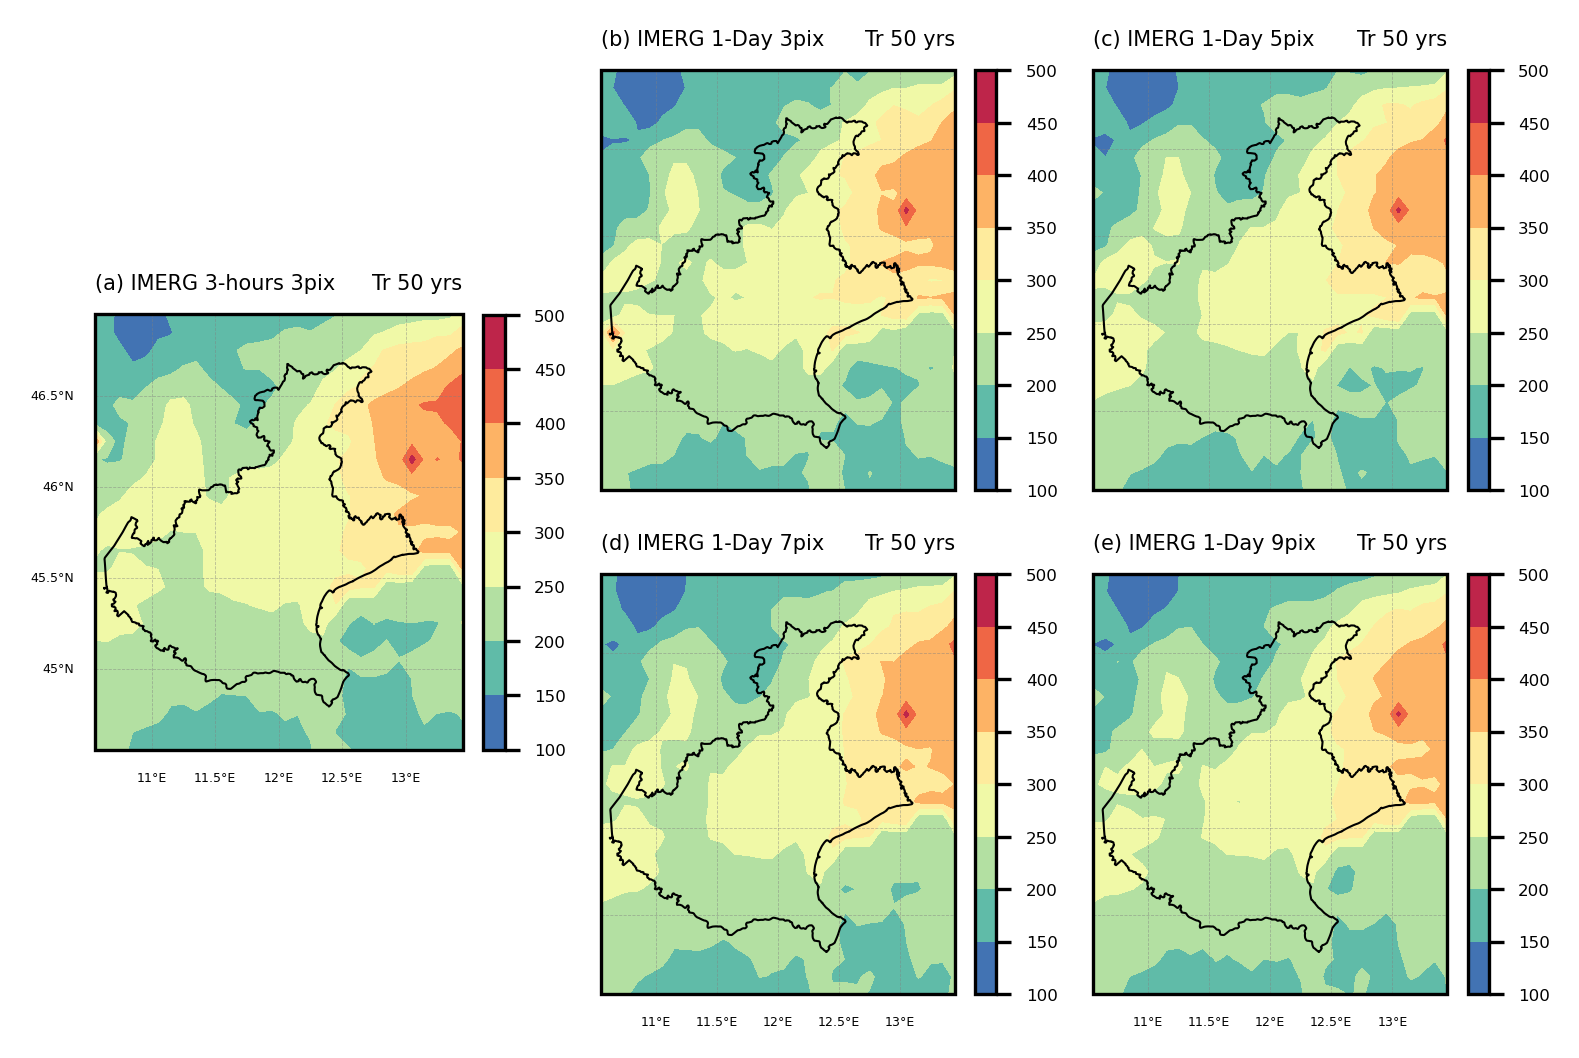

In [23]:
cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(6,4),dpi=300)
gs = gridspec.GridSpec(2,3)

# ==============================================================================
ax1 = plt.subplot(gs[0:, 0], projection = proj)
VENETO.plot(facecolor='None', ax=ax1, zorder=10, linewidth=0.5)
# DEM.plot(facecolor='None', ax=ax1, zorder=10, linewidth=0.1, color='grey', alpha=0.6)

a1 = ax1.contourf(lon2d_ref, lat2d_ref, Q50[0,:,:], cmap=cmap)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels = True
gl.xlabel_style = {'size': 3, 'color': 'k'}
gl.ylabel_style = {'size': 3, 'color': 'k'}

cbar = plt.colorbar(a1, fraction=0.053)
cbar.ax.tick_params(labelsize=4)

ax1.set_title('(a) IMERG 3-hours 3pix', fontsize=5, loc='left')
ax1.set_title('Tr 50 yrs', fontsize=5, loc='right')

# ==============================================================================
ax1 = plt.subplot(gs[0, 1], projection = proj)
VENETO.plot(facecolor='None', ax=ax1, zorder=10, linewidth=0.5)

a1 = ax1.contourf(lon2d_ref, lat2d_ref, Q50[1,:,:], cmap=cmap)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.right_labels = False
gl.left_labels = False
gl.xlabel_style = {'size': 3, 'color': 'k'}
gl.ylabel_style = {'size': 3, 'color': 'k'}

cbar = plt.colorbar(a1, fraction=0.053)
cbar.ax.tick_params(labelsize=4)

ax1.set_title('(b) IMERG 1-Day 3pix', fontsize=5, loc='left')
ax1.set_title('Tr 50 yrs', fontsize=5, loc='right')

# ==============================================================================
ax1 = plt.subplot(gs[0, 2], projection = proj)
VENETO.plot(facecolor='None', ax=ax1, zorder=10, linewidth=0.5)

a1 = ax1.contourf(lon2d_ref, lat2d_ref, Q50[2,:,:], cmap=cmap)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.right_labels = False
gl.left_labels = False
gl.xlabel_style = {'size': 3, 'color': 'k'}
gl.ylabel_style = {'size': 3, 'color': 'k'}

cbar = plt.colorbar(a1, fraction=0.053)
cbar.ax.tick_params(labelsize=4)

ax1.set_title('(c) IMERG 1-Day 5pix', fontsize=5, loc='left')
ax1.set_title('Tr 50 yrs', fontsize=5, loc='right')

# ==============================================================================
ax1 = plt.subplot(gs[1, 1], projection = proj)
VENETO.plot(facecolor='None', ax=ax1, zorder=10, linewidth=0.5)

a1 = ax1.contourf(lon2d_ref, lat2d_ref, Q50[3,:,:], cmap=cmap)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels = False
gl.xlabel_style = {'size': 3, 'color': 'k'}
gl.ylabel_style = {'size': 3, 'color': 'k'}

cbar = plt.colorbar(a1, fraction=0.053)
cbar.ax.tick_params(labelsize=4)

ax1.set_title('(d) IMERG 1-Day 7pix', fontsize=5, loc='left')
ax1.set_title('Tr 50 yrs', fontsize=5, loc='right')

# ==============================================================================
ax1 = plt.subplot(gs[1, 2], projection = proj)
VENETO.plot(facecolor='None', ax=ax1, zorder=10, linewidth=0.5)

a1 = ax1.contourf(lon2d_ref, lat2d_ref, Q50[4,:,:], cmap=cmap)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels = False
gl.xlabel_style = {'size': 3, 'color': 'k'}
gl.ylabel_style = {'size': 3, 'color': 'k'}

cbar = plt.colorbar(a1, fraction=0.053)
cbar.ax.tick_params(labelsize=4)

ax1.set_title('(e) IMERG 1-Day 9pix', fontsize=5, loc='left')
ax1.set_title('Tr 50 yrs', fontsize=5, loc='right')

# ==============================================================================
salida = os.path.join('..','figures',f'VENETO_IMERG_Tr.png')
print(f'Export figure to: {salida}')
plt.savefig(salida,transparent = False,bbox_inches ='tight',pad_inches = 0.1, facecolor=None)

In [24]:
Q50_list = np.zeros([5, len(lat)*len(lon)])
for nn in range(5):
    Q50_list[nn,:] = Q50[nn,:,:].flatten()

Export figure to: ../figures/VENETO_IMERG_Tr_diff_box.png


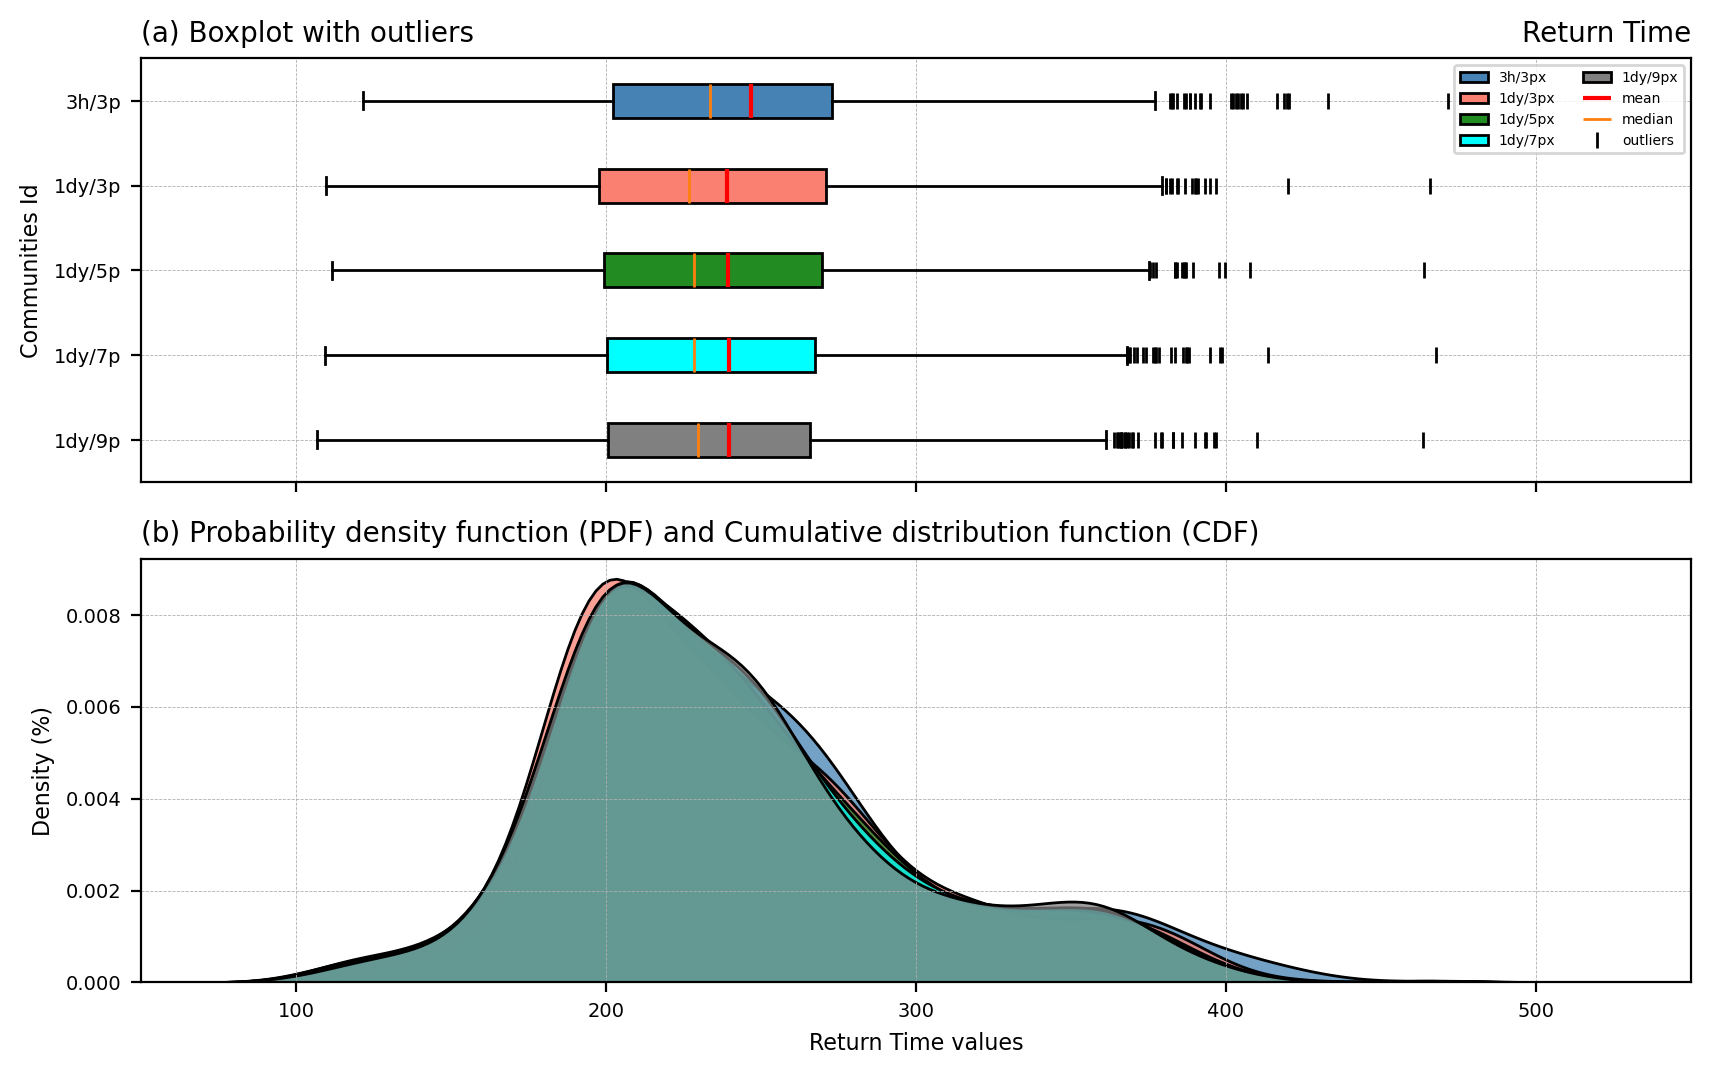

In [25]:
fig = plt.figure(figsize=(10,6),dpi=200)
gs = gridspec.GridSpec(2,1)

colors = ['steelblue', 'salmon', 'forestgreen', 'cyan', 'grey']

boxes = []
medians = []
mean = []
fliers = []

# =========================================================================================================================
ax1 = plt.subplot(gs[0, 0])
for nn in range(np.shape(Q50_list)[0]):
    box = ax1.boxplot(Q50_list[nn],positions=[5-nn],vert=False,
    widths=0.4,boxprops=dict(facecolor=colors[nn],color='k'),
    showmeans=True,meanline=True,meanprops=dict(linestyle='-',color="r",linewidth=1.5),
    showfliers=True,flierprops=dict(marker='|',color='k',linewidth=1.5),
    patch_artist=True,notch=False)

    boxes.append(box["boxes"][0])
    medians.append(box["medians"][0])
    mean.append(box["means"][0])
    fliers.append(box["fliers"][0])

ax1.set_xlim(50,550)

ax1.set_xticklabels([])
ax1.set_ylabel('Communities Id',fontsize=8)
ax1.set_title('(a) Boxplot with outliers',fontsize=10, loc='left')
ax1.set_title('Return Time',fontsize=10, loc='right')

ax1.set_yticks([1,2,3,4,5])
ax1.set_yticklabels(['1dy/9p', '1dy/7p', '1dy/5p', '1dy/3p', '3h/3p'])

ax1.tick_params(axis='both', which='major', labelsize=7)
ax1.grid(linestyle='--',linewidth=0.3)

ax1.legend([boxes[0], boxes[1], boxes[2], boxes[3], boxes[4], mean[0], medians[0], fliers[0]],
        [labels[0], labels[1], labels[2], labels[3], labels[4], 'mean', 'median', 'outliers'], 
        ncol=2,fontsize=5,loc=0)

# =========================================================================================================================
ax1 = plt.subplot(gs[1, 0])
for nn in range(np.shape(Q50_list)[0]):
    sns.kdeplot(Q50_list[nn],color=colors[nn],cumulative=False,multiple="stack",ax=ax1)
    # ax2 = ax1.twinx()
    # a2 = ax2.plot(np.sort(BETA_list[nn]),cummulativeC[nn],color=colors[nn],linewidth=2,alpha=1)

ax1.set_xlim(50,550)

ax1.set_xlabel('Return Time values',fontsize=8)
ax1.set_ylabel('Density (%)',fontsize=8)
ax2.set_ylabel('CDF',fontsize=8)
ax1.set_title('(b) Probability density function (PDF) and Cumulative distribution function (CDF)',fontsize=10, loc='left')

ax1.tick_params(axis='both', which='major', labelsize=7)
ax1.grid(linestyle='--',linewidth=0.3)

# =========================================================================================================================
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, hspace=0.18, wspace=0.09)

# ==============================================================================
salida = os.path.join('..','figures',f'VENETO_IMERG_Tr_diff_box.png')
print(f'Export figure to: {salida}')
plt.savefig(salida,transparent = False,bbox_inches ='tight',pad_inches = 0.1, facecolor=None)

In [26]:
ERR = np.zeros([4, len(lat_ref), len(lon_ref)])
ERR[0,:,:] = Q50[0,:,:] - Q50[1,:,:]
ERR[1,:,:] = Q50[0,:,:] - Q50[2,:,:]
ERR[2,:,:] = Q50[0,:,:] - Q50[3,:,:]
ERR[3,:,:] = Q50[0,:,:] - Q50[4,:,:]

Export figure to: ../figures/VENETO_IMERG_Tr_diff.png


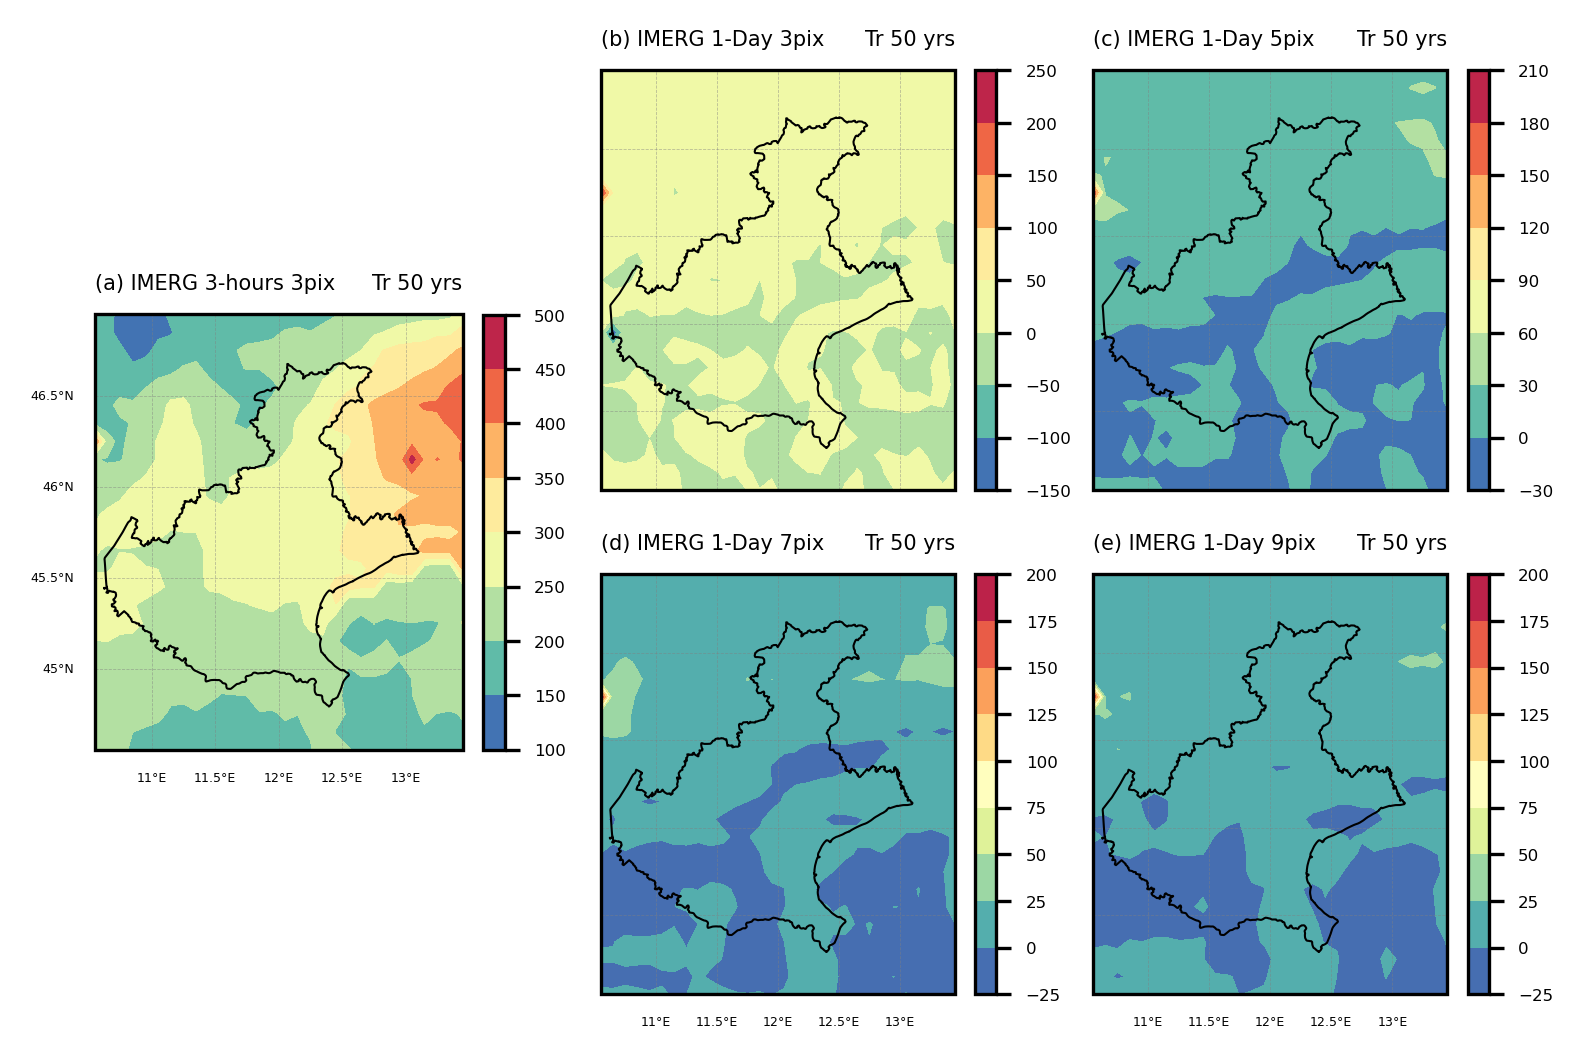

In [27]:
levels = np.arange(-250,300,50)
levels = None

cmap = plt.cm.Spectral_r
cmap_diff = plt.cm.bwr_r
cmap_diff = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(6,4),dpi=300)
gs = gridspec.GridSpec(2,3)

# ==============================================================================
ax1 = plt.subplot(gs[0:, 0], projection = proj)
VENETO.plot(facecolor='None', ax=ax1, zorder=10, linewidth=0.5)
# DEM.plot(facecolor='None', ax=ax1, zorder=10, linewidth=0.1, color='grey', alpha=0.6)

a1 = ax1.contourf(lon2d_ref, lat2d_ref, Q50[0,:,:], cmap=cmap)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels = True
gl.xlabel_style = {'size': 3, 'color': 'k'}
gl.ylabel_style = {'size': 3, 'color': 'k'}

cbar = plt.colorbar(a1, fraction=0.053)
cbar.ax.tick_params(labelsize=4)

ax1.set_title('(a) IMERG 3-hours 3pix', fontsize=5, loc='left')
ax1.set_title('Tr 50 yrs', fontsize=5, loc='right')

# ==============================================================================
ax1 = plt.subplot(gs[0, 1], projection = proj)
VENETO.plot(facecolor='None', ax=ax1, zorder=10, linewidth=0.5)

a1 = ax1.contourf(lon2d_ref, lat2d_ref, ERR[0,:,:], cmap=cmap_diff, levels=levels)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.right_labels = False
gl.left_labels = False
gl.xlabel_style = {'size': 3, 'color': 'k'}
gl.ylabel_style = {'size': 3, 'color': 'k'}

cbar = plt.colorbar(a1, fraction=0.053)
cbar.ax.tick_params(labelsize=4)

ax1.set_title('(b) IMERG 1-Day 3pix', fontsize=5, loc='left')
ax1.set_title('Tr 50 yrs', fontsize=5, loc='right')

# ==============================================================================
ax1 = plt.subplot(gs[0, 2], projection = proj)
VENETO.plot(facecolor='None', ax=ax1, zorder=10, linewidth=0.5)

a1 = ax1.contourf(lon2d_ref, lat2d_ref, ERR[1,:,:], cmap=cmap_diff, levels=levels)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.right_labels = False
gl.left_labels = False
gl.xlabel_style = {'size': 3, 'color': 'k'}
gl.ylabel_style = {'size': 3, 'color': 'k'}

cbar = plt.colorbar(a1, fraction=0.053)
cbar.ax.tick_params(labelsize=4)

ax1.set_title('(c) IMERG 1-Day 5pix', fontsize=5, loc='left')
ax1.set_title('Tr 50 yrs', fontsize=5, loc='right')

# ==============================================================================
ax1 = plt.subplot(gs[1, 1], projection = proj)
VENETO.plot(facecolor='None', ax=ax1, zorder=10, linewidth=0.5)

a1 = ax1.contourf(lon2d_ref, lat2d_ref, ERR[2,:,:], cmap=cmap_diff, levels=levels)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels = False
gl.xlabel_style = {'size': 3, 'color': 'k'}
gl.ylabel_style = {'size': 3, 'color': 'k'}

cbar = plt.colorbar(a1, fraction=0.053)
cbar.ax.tick_params(labelsize=4)

ax1.set_title('(d) IMERG 1-Day 7pix', fontsize=5, loc='left')
ax1.set_title('Tr 50 yrs', fontsize=5, loc='right')

# ==============================================================================
ax1 = plt.subplot(gs[1, 2], projection = proj)
VENETO.plot(facecolor='None', ax=ax1, zorder=10, linewidth=0.5)

a1 = ax1.contourf(lon2d_ref, lat2d_ref, ERR[3,:,:], cmap=cmap_diff, levels=levels)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels = False
gl.xlabel_style = {'size': 3, 'color': 'k'}
gl.ylabel_style = {'size': 3, 'color': 'k'}

cbar = plt.colorbar(a1, fraction=0.053)
cbar.ax.tick_params(labelsize=4)

ax1.set_title('(e) IMERG 1-Day 9pix', fontsize=5, loc='left')
ax1.set_title('Tr 50 yrs', fontsize=5, loc='right')

# ==============================================================================
salida = os.path.join('..','figures',f'VENETO_IMERG_Tr_diff.png')
print(f'Export figure to: {salida}')
# plt.savefig(salida,transparent = False,bbox_inches ='tight',pad_inches = 0.1, facecolor=None)

In [28]:
ERR_flat = np.zeros([4, len(lat)*len(lon)])
for nn in range(4):
    ERR_flat[nn,:] = ERR[nn,:,:].flatten()

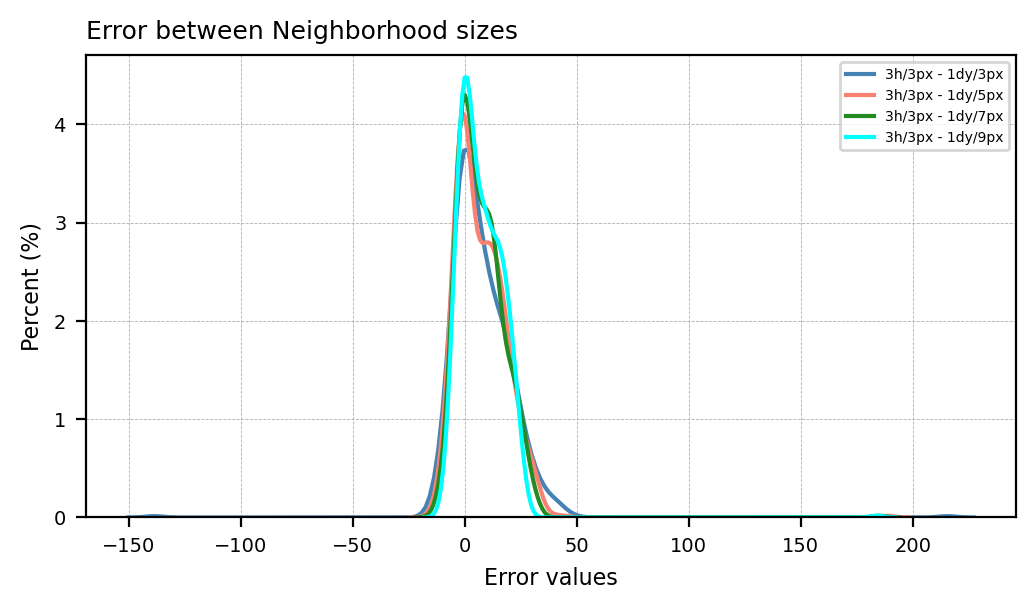

In [ ]:
fig = plt.figure(figsize=(6,3),dpi=200)
gs = gridspec.GridSpec(1,1)

# =========================================================================================================================
ax1 = plt.subplot(gs[0, 0])
for nn in range(4):
    sns.kdeplot(ERR_flat[nn],color=colors[nn],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'{labels[0]} - {labels[nn+1]}')

ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y * 100:.0f}'))
ax1.set_title('Error between Neighborhoods size',fontsize=9,loc='left')
ax1.set_ylabel('Percent (%)',fontsize=8)
ax1.set_xlabel('Error values',fontsize=8)
ax1.legend(fontsize=5, loc=0)
ax1.grid(linewidth=0.3, linestyle='--')
ax1.tick_params(axis='both', which='major', labelsize=7)